In [1]:
import gmaps
import numpy as np
import pandas as pd
import os
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# # Google developer API key
# from config import gkey

# # Configure gmaps
# gmaps.configure(api_key=gkey)

# Create aiport dataframe

path = pd.read_csv('indeed_job_dataset_V2_CSV.csv')
df = pd.DataFrame(path)
df
# airport_df = pd.read_csv('../Resources/Airport_Output.csv')
df.fillna(0) 
df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
path2 = pd.read_csv('OES_Report-V2.csv')
BLS_df = pd.DataFrame(path2)
BLS_df
BLS_df["Annual mean wage(2)"] = BLS_df["Annual mean wage(2)"].str.replace(",","")
BLS_df["Annual mean wage(2)"] = BLS_df["Annual mean wage(2)"].astype("float64")
BLS_df = BLS_df.iloc[:,1:3]
BLS_df=pd.DataFrame(BLS_df)
BLS_df

,State Two-Letter,Annual mean wage(2)
0,AL,44930.0
1,AK,59290.0
2,AZ,50930.0
3,AR,42690.0
4,CA,61290.0
5,CO,57690.0
6,CT,62350.0
7,DE,54370.0
8,DC,89800.0
9,FL,47750.0


In [3]:
df_grouped= df.groupby('Location')['Salary_Index'].agg(['mean','median', 'var', 'std', 'sem']).reset_index()
df_grouped = pd.DataFrame(df_grouped)
df_grouped

df_grouped = df_grouped.rename(columns={'Location':'State Two-Letter'})
df_grouped
df_grouped=pd.DataFrame(df_grouped)
df_grouped

,State Two-Letter,mean,median,var,std,sem
0,AL,2.529412,2.0,0.889706,0.943242,0.228770
1,AR,2.714286,3.0,1.470899,1.212806,0.229199
2,AZ,2.792453,3.0,1.206096,1.098224,0.150853
3,CA,3.969176,4.0,2.131761,1.460055,0.039091
4,CO,2.963303,3.0,1.350493,1.162107,0.111310
5,CT,2.933333,3.0,1.927928,1.388498,0.160330
6,DC,3.107143,3.0,1.549589,1.244825,0.105207
7,DE,3.470588,3.0,1.639706,1.280510,0.310569
8,FL,2.514563,3.0,1.546354,1.243525,0.122528
9,GA,2.589928,2.0,1.678449,1.295550,0.109887


In [4]:
#https://stackoverflow.com/questions/40755680/how-to-reset-index-pandas-dataframe-after-dropna-pandas-dataframe
# df_grouped = df_grouped['Location']=['REMOTE','USA'])
df_grouped1 = df_grouped.drop(37)
df_grouped2 = df_grouped1.drop(43)
df_grouped2.reset_index(drop=True,inplace=True)
df_grouped2=pd.DataFrame(df_grouped2)
df_grouped2

,State Two-Letter,mean,median,var,std,sem
0,AL,2.529412,2.0,0.889706,0.943242,0.228770
1,AR,2.714286,3.0,1.470899,1.212806,0.229199
2,AZ,2.792453,3.0,1.206096,1.098224,0.150853
3,CA,3.969176,4.0,2.131761,1.460055,0.039091
4,CO,2.963303,3.0,1.350493,1.162107,0.111310
5,CT,2.933333,3.0,1.927928,1.388498,0.160330
6,DC,3.107143,3.0,1.549589,1.244825,0.105207
7,DE,3.470588,3.0,1.639706,1.280510,0.310569
8,FL,2.514563,3.0,1.546354,1.243525,0.122528
9,GA,2.589928,2.0,1.678449,1.295550,0.109887


In [5]:
merge_df = pd.merge(BLS_df, df_grouped2, how='left', on='State Two-Letter')      
merge_df

,State Two-Letter,Annual mean wage(2),mean,median,var,std,sem
0,AL,44930.0,2.529412,2.0,0.889706,0.943242,0.228770
1,AK,59290.0,NaN,NaN,NaN,NaN,NaN
2,AZ,50930.0,2.792453,3.0,1.206096,1.098224,0.150853
3,AR,42690.0,2.714286,3.0,1.470899,1.212806,0.229199
4,CA,61290.0,3.969176,4.0,2.131761,1.460055,0.039091
5,CO,57690.0,2.963303,3.0,1.350493,1.162107,0.111310
6,CT,62350.0,2.933333,3.0,1.927928,1.388498,0.160330
7,DE,54370.0,3.470588,3.0,1.639706,1.280510,0.310569
8,DC,89800.0,3.107143,3.0,1.549589,1.244825,0.105207
9,FL,47750.0,2.514563,3.0,1.546354,1.243525,0.122528


In [6]:
#CPI
path3 = pd.read_csv('CPI.csv')
CPI_df = pd.DataFrame(path3)
CPI_df

spc_cpi=CPI_df[["State","costIndex"]]

spc_cpi = spc_cpi.rename(columns={'State':'State Two-Letter'})
spc_cpi

,State Two-Letter,costIndex
0,MS,86.1
1,AR,86.9
2,OK,87.0
3,MO,87.1
4,NM,87.5
5,TN,88.7
6,MI,88.9
7,KS,89.0
8,GA,89.2
9,WY,89.3


In [7]:
merge_df2 = pd.merge(merge_df, spc_cpi, how='left', on='State Two-Letter')      
merge_df2

,State Two-Letter,Annual mean wage(2),mean,median,var,std,sem,costIndex
0,AL,44930.0,2.529412,2.0,0.889706,0.943242,0.228770,89.3
1,AK,59290.0,NaN,NaN,NaN,NaN,NaN,129.9
2,AZ,50930.0,2.792453,3.0,1.206096,1.098224,0.150853,97.0
3,AR,42690.0,2.714286,3.0,1.470899,1.212806,0.229199,86.9
4,CA,61290.0,3.969176,4.0,2.131761,1.460055,0.039091,151.7
5,CO,57690.0,2.963303,3.0,1.350493,1.162107,0.111310,105.6
6,CT,62350.0,2.933333,3.0,1.927928,1.388498,0.160330,127.7
7,DE,54370.0,3.470588,3.0,1.639706,1.280510,0.310569,108.1
8,DC,89800.0,3.107143,3.0,1.549589,1.244825,0.105207,NaN
9,FL,47750.0,2.514563,3.0,1.546354,1.243525,0.122528,97.9


In [32]:
merge_df2["Dec_CPI"]=merge_df2["costIndex"]/100
merge_df2
merge_df2["Labor-Calculated"]=merge_df2["Annual mean wage(2)"]/merge_df2["Dec_CPI"]
merge_df2
merge_df2["Gains/Loss-Labor Stats"]=merge_df2["Annual mean wage(2)"]-merge_df2["Calculated"]
merge_df2

merge_df2["New_Income"]=merge_df2["median"]
merge_df2
merge_df3=merge_df2.replace(to_replace = 1.0,value=70000)
merge_df3=merge_df3.replace(to_replace = 2.0,value=90000)
merge_df3=merge_df3.replace(to_replace = 3.0,value=110000)
merge_df3=merge_df3.replace(to_replace = 4.0,value=130000)
merge_df3=merge_df3.replace(to_replace = 5.0,value=150000)
merge_df3=merge_df3.replace(to_replace = 6.0,value=170000)
merge_df3=merge_df3.replace(to_replace = 2.5,value=110000)
merge_df3=merge_df3.dropna()



In [48]:
merge_df3

merge_df3["Indeed-Calculated"]=merge_df3["New_Income"]/merge_df3["Dec_CPI"]
merge_df3["Gains/Loss-Indeed Stats"]=merge_df3["Indeed-Calculated"]-merge_df3["Calculated"]
merge_df3

merge_df4=merge_df3[["State Two-Letter", "Annual mean wage(2)", "Dec_CPI","Labor-Calculated","Gains/Loss-Labor Stats", "New_Income", "Indeed-Calculated","Gains/Loss-Indeed Stats"]]
merge_df5=merge_df4.sort_values(by="Gains/Loss-Indeed Stats",ascending=True)
merge_df5

,State Two-Letter,Annual mean wage(2),Dec_CPI,Labor-Calculated,Gains/Loss-Labor Stats,New_Income,Indeed-Calculated,Gains/Loss-Indeed Stats
3,AR,42690.0,0.869,49125.431530,-6435.431530,110000.0,126582.278481,77456.846951
36,OK,45620.0,0.870,52436.781609,-6816.781609,110000.0,126436.781609,74000.000000
16,KS,46520.0,0.890,52269.662921,-5749.662921,110000.0,123595.505618,71325.842697
12,ID,44890.0,0.923,48634.886241,-3744.886241,110000.0,119176.598050,70541.711809
15,IA,47330.0,0.901,52530.521643,-5200.521643,110000.0,122086.570477,69556.048835
40,SC,44380.0,0.959,46277.372263,-1897.372263,110000.0,114702.815433,68425.443170
27,NE,48250.0,0.908,53138.766520,-4888.766520,110000.0,121145.374449,68006.607930
50,WY,49760.0,0.893,55722.284434,-5962.284434,110000.0,123180.291153,67458.006719
35,OH,49430.0,0.908,54438.325991,-5008.325991,110000.0,121145.374449,66707.048458
43,TX,50490.0,0.915,55180.327869,-4690.327869,110000.0,120218.579235,65038.251366


In [57]:
top_5=merge_df5.set_index("State Two-Letter")
top_5=top_5["Gains/Loss-Indeed Stats"]
top_5=pd.DataFrame(top_5.nlargest(5))
top_5

,Gains/Loss-Indeed Stats
State Two-Letter,
AR,77456.846951
OK,74000.000000
KS,71325.842697
ID,70541.711809
IA,69556.048835


In [58]:
bottom_5=merge_df5.set_index("State Two-Letter")
bottom_5=bottom_5["Gains/Loss-Indeed Stats"]
bottom_5=pd.DataFrame(bottom_5.nsmallest(5))
bottom_5

,Gains/Loss-Indeed Stats
State Two-Letter,
VT,16489.082969
HI,28548.470710
NH,32862.351869
MN,33572.834646
MA,33677.811550


In [9]:
df_cleaned = df.dropna(subset=['No_of_Skills'])

# df.loc[df['No_of_Skills']].dropna()
df_cleaned.head()
df_cleaned

df_cleaned['Queried_Salary'].describe

<bound method NDFrame.describe of 0        <80000
1        <80000
2        <80000
3        <80000
4        <80000
         ...   
5710    >160000
5711    >160000
5712    >160000
5713    >160000
5714    >160000
Name: Queried_Salary, Length: 5483, dtype: object>

                No_of_Skills
Queried_Salary              
<80000              4.410480
80000-99999         6.473154
100000-119999       8.606618
120000-139999       9.767296
140000-159999       9.727378
>160000             8.007353
8.13386832026263


C:\Users\nguye\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000017E7F482248> has a label of '_line0' which cannot be automatically added to the legend.


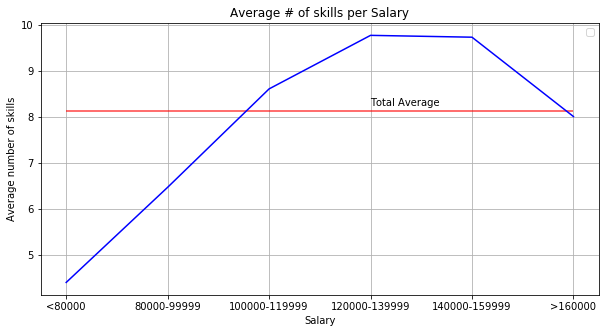

Total Average Skills = 8.13386832026263


,No_of_Skills
Queried_Salary,
<80000,4.410480
80000-99999,6.473154
100000-119999,8.606618
120000-139999,9.767296
140000-159999,9.727378


In [76]:
salary=df_cleaned.groupby("Queried_Salary")["No_of_Skills"].mean()
salary_df=pd.DataFrame(salary)
resalary_df=salary_df.reindex(index=["<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"])
print(resalary_df)

total_avg_skill=df_cleaned["No_of_Skills"].mean()
print(total_avg_skill)

plt.figure(figsize=(10,5))
x=[1,2,3,4,5,6]
y=resalary_df["No_of_Skills"]
xticks=["<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"]
plot1=plt.plot(x,y,color="blue")
plt.xticks(x,xticks)
plt.hlines(total_avg_skill,1,6,alpha=0.75, color="red")
plt.text(4, 8.3, "Total Average", ha='left', va='center')
plt.legend(handles=plot1,loc="best")
plt.title("Average # of skills per Salary")
plt.xlabel("Salary")
plt.ylabel("Average number of skills")
plt.grid()
plt.show()


print(f"Total Average Skills = {total_avg_skill}")
resalary_df.head()

## 

                Job_Type
data_scientist      2496
data_analyst        1630
data_engineer       1357


,Job_Type
data_scientist,45.522524
data_analyst,29.728251
data_engineer,24.749225


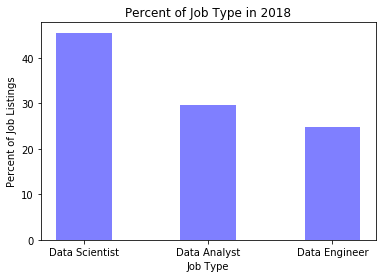

In [81]:
#Which is more in demand (data scientist, analyst, engineer?)
#What is the difference between them?

job_type=df_cleaned["Job_Type"].value_counts()
job_type_df=pd.DataFrame(job_type)

print(job_type_df)

sum_type=job_type_df.sum()

job_type_df=job_type_df/sum_type*100

listing=job_type_df["Job_Type"]
x_axis = [1,2,3]

width=0.45
plt.bar(x_axis, listing, width, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Data Scientist", "Data Analyst", "Data Engineer"])


plt.title("Percent of Job Type in 2018")
plt.xlabel("Job Type")
plt.ylabel("Percent of Job Listings")
job_type_df.head()

In [12]:
#Skills for each job type?
skill_set_type=df_cleaned.groupby("Job_Type")[["python","sql","machine learning","r","hadoop","tableau","sas","spark","java"]].sum()
skill_set_type.head()

,python,sql,machine learning,r,hadoop,tableau,sas,spark,java
Job_Type,,,,,,,,,
data_analyst,512,1044,166,456,126,538,310,67,101
data_engineer,901,867,289,228,761,214,67,719,704
data_scientist,1912,1193,1842,1550,827,484,564,745,675


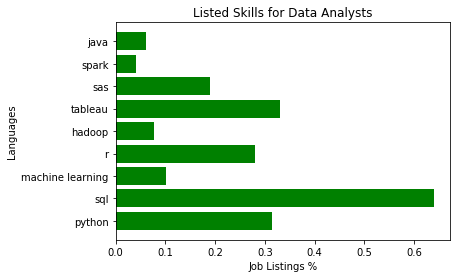

In [60]:
#Credit: https://benalexkeen.com/bar-charts-in-matplotlib/
x=list(skill_set_type.columns.values)
data_analyst = skill_set_type.iloc[0,:]/1630
data_engineer = skill_set_type.iloc[1,:]/1357
data_scientist = skill_set_type.iloc[2,:]/2496

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data_analyst, color='green')
plt.ylabel("Languages")
plt.xlabel("Job Listings %")
plt.title("Listed Skills for Data Analysts")

plt.yticks(x_pos, x)

plt.show()

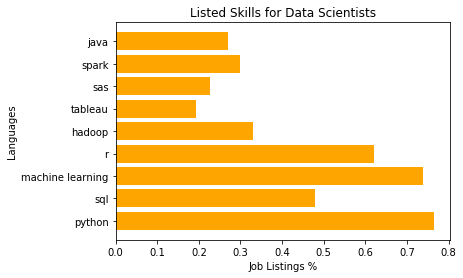

In [62]:
x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data_scientist, color='orange')
plt.ylabel("Languages")
plt.xlabel("Job Listings %")
plt.title("Listed Skills for Data Scientists")

plt.yticks(x_pos, x)

plt.show()

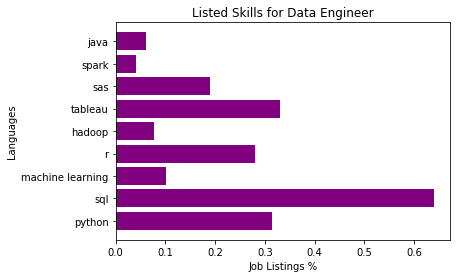

In [61]:
x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data_analyst, color='purple')
plt.ylabel("Languages")
plt.xlabel("Job Listings %")
plt.title("Listed Skills for Data Engineer")

plt.yticks(x_pos, x)

plt.show()

In [16]:
test=df_cleaned["Job_Title"].value_counts()
test.head(30)

Data Scientist                      701
Data Engineer                       383
Data Analyst                        378
Senior Data Scientist               205
Senior Data Engineer                134
Senior Data Analyst                  81
Big Data Engineer                    79
Principal Data Scientist             62
Lead Data Scientist                  48
Sr. Data Scientist                   45
Sr. Data Engineer                    39
Staff Data Scientist                 38
Senior Big Data Engineer             33
Marketing Data Analyst               27
Big Data Engineer - AWS & Hadoop     25
Data Analyst II                      25
Lead Data Engineer                   23
Data Scientist, Senior               23
Business Data Analyst                22
Sr Data Engineer                     21
Sr Data Scientist                    21
Data Scientist, Mid                  19
Sr. Data Analyst                     19
AWS Big Data Engineer                18
Associate Data Scientist             17
